<a href="https://colab.research.google.com/github/mcpolandm/CMSC320-Assignment-1-Dr.Alam/blob/main/Molly_McPoland_CMSC320_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOMEWORK 1: CAUTION! CONTENTS ARE HOT** 🌋
## **DUE: *SEPTEMBER 19, 2024 @ 11:59 PM***
## **24-HR LATE DUE DATE WITH A 15% PENALTY: *SEPTEMBER 20, 2024 @ 11:59 PM***

---------------------
#### **DATASET DESCRIPTION**

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)

#### **Objective of the Assignment:**

**We are going to dive straight into these volcanoes (well... their dataset), to swim our way into Pandas and SQL proficiency!**

You will find the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) helpful. There are also some helpful links to guide you along the way! Don't get burned 🔥

---------------------

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  😋❤️‍🔥
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

### **Part 1: Maintenance 🤩 (25 POINTS TOTAL)**
First, we're going to familiarize ourselves with the process. As in most languages, Python looks best when its modules are imported first before any other code is written ✨

In [1]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here
import matplotlib.pyplot as plt
import numpy as np

# Don't remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there's another library aside from Pandas called "[requests](https://requests.readthedocs.io/en/latest/)." **The requests library allows you to send HTTP requests to a server, retrieve the content, and process it at ease.** It's very beginner friendly for those attempting to get into webscraping (super important for collecting and creating datasets). We also recommend looking into [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) (yeah, soup LOL), another wonderful library that can be paired with the requests library for webscraping.

As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [2]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Cute Webscraping (5 points)**
To make our cute webscraper we need to **create a GET request** using the relevant information given above.

This particular dataset NOAA returns data from the API as ***json*** when a user makes a request. The json data has a particular format, so we will extract our needed information only from the field called **items** to make a dataframe.

**After properly scraping the data, name this dataframe** ***df***

**Save this dataframe into a CSV file named 'volcanoes.csv'**

**You won't need to run this more than once**

In [3]:
got = requests.get(api_url, headers = headers)
data = got.json()
items = data['items']
df = pd.DataFrame(items)
csv = df.to_csv("volcanoes.csv")
print(df)

      id  year  month   day  tsunamiEventId  earthquakeEventId  \
0      1  1169    2.0   4.0          2852.0              421.0   
1      2  1329    7.0   NaN             NaN                NaN   
2      3  1883    3.0   NaN             NaN                NaN   
3      4  1888    3.0  13.0          1175.0                NaN   
4      5  1850    NaN   NaN             NaN                NaN   
5      6  1832   11.0   1.0             NaN                NaN   
6      7  1977    1.0  10.0             NaN                NaN   
7      8   787    NaN   NaN             NaN                NaN   
8      9  1779    8.0   8.0             NaN                NaN   
9     10  1302    NaN   NaN             NaN                NaN   
10    11  1907    8.0   4.0             NaN                NaN   
11    12  1905    3.0  10.0             NaN                NaN   
12    13  1986    7.0  24.0             NaN                NaN   
13    14  1536    3.0  23.0             NaN                NaN   
14    15  

#### **TASK 1.1: 1 Liner Thingz (3 points)**

We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.

**Read the directions carefully and code your answer with only one line of code.**

***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** *In one line of code and **using only one function**, show how many **total datapoints and features** there are in the dataframe **together**.*

In [4]:
df.shape

(200, 43)

**1.1.2:** *In one line of code, list the **names** of all the **features** in the dataframe.*

In [5]:
df.columns

Index(['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'volcanoLocationNum',
       'name', 'location', 'country', 'latitude', 'longitude', 'elevation',
       'morphology', 'agent', 'deathsTotal', 'deathsAmountOrderTotal',
       'damageAmountOrderTotal', 'significant', 'publish', 'eruption',
       'status', 'timeErupt', 'vei', 'deathsAmountOrder', 'damageAmountOrder',
       'housesDestroyedAmountOrderTotal', 'deaths', 'injuries',
       'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDestroyedAmountOrder', 'housesDestroyed', 'housesDestroyedTotal',
       'missingAmountOrder', 'missingAmountOrderTotal', 'missing',
       'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal'],
      dtype='object')

We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **contains all** the features of the **old** dataframe **except the following**:*

volcanoLocationNum, location, latitude, longitude, agent, significant,	publish,	eruption,	status, timeErupt, damageAmountOrder, damageAmountOrderTotal, housesDestroyedAmountOrder,	housesDestroyedAmountOrderTotal, housesDestroyed,	housesDestroyedTotal,	missingAmountOrder,	missingAmountOrderTotal,	missing,	missingTotal, damageMillionsDollars, damageMillionsDollarsTotal, injuries, injuriesAmountOrder, injuriesTotal, injuriesAmountOrderTotal, deathsAmountOrderTotal, and deathsAmountOrder.



In [6]:
new_df = df[['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
             'volcanoLocationId', 'volcanoLocationNewNum', 'name', 'country', 'elevation', 'morphology', 'deathsTotal', 'vei', 'deaths']].copy()

# KEEP THIS. It will display the whole dataframe.
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
1,2,1329,7.0,NaN,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,1.0,NaN
2,3,1883,3.0,NaN,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,NaN,2.0,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
4,5,1850,NaN,NaN,NaN,NaN,50214,252140,Rabaul,Papua New Guinea,688,Pyroclastic shield,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
7,8,787,NaN,NaN,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,3.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
9,10,1302,NaN,NaN,NaN,NaN,10103,211030,Ischia,Italy,789,Complex volcano,NaN,NaN,NaN


#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code, **discard any row** that contains **NaN** in **any one** of the columns indicating **time**.*

In [7]:
new_df = new_df [(new_df['day'].notnull()) & (new_df['month'].notnull()) & (new_df['year'].notnull())]

# KEEP THIS. It will display the whole dataframe.
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
10,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
11,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
12,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
13,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
14,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


**1.2.2:** *In one line of code, **reset** the **index column** of the dataframe so that it has **1-based indexing**.*

In [8]:
new_df.index = range(1, len(new_df)+1)

# KEEP THIS. It will display the whole dataframe.
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
1,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
2,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
3,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
4,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
5,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
6,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
7,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
8,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
9,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
10,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns. If there is* ***NaN*** *in* ***one column*** *and a* ***numerical*** *value in the* ***other***, *it will ***take the numerical value***. ***Only*** if there are* ***NaNs*** *in* ***both*** *columns, the* ***new column will have NaN.***

In [9]:
new_df['totalDeaths'] = new_df[['deaths', 'deathsTotal']].max()

# KEEP THIS. It will display the whole dataframe.
new_df

<ipython-input-9-7cebb7a5a0fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['totalDeaths'] = new_df[['deaths', 'deathsTotal']].max()


,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
1,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN,NaN
2,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN,NaN
3,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN,NaN
4,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN,NaN
5,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN,NaN
6,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN,NaN
7,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0,NaN
8,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,NaN
9,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0,NaN
10,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0,NaN


#### **TASK 1.3: Tailoring Time (10 Points)**
It's pretty obvious that the year, month, and day look pretty weird in the dataset. We're going to have to do some hardcore cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html). We will learn more about data cleaning in class soon, but here we will perform some basic data cleaning.

**We need to have only ONE column called** "***date***" **that contains the full date (YYYY-MM-DD), not separated into three columns.**

***Make sure there are no floating point values in the date and sort the data from most recent to least.***

***Remove the old columns and place the new column next to the 'id' column.***


**YOU CAN USE MULTIPLE LINES OF CODE BUT CAN'T USE LOOPS.**

**Note:** It is alright to have only a **maximum of 12 NaTs** for some dates that often go further back than the 1600s because the datetime module in Pandas has a limit (unless otherwise guided).

In [10]:
new_df.insert(1, 'date', pd.to_datetime(new_df[['year', 'month', 'day']], errors = 'coerce'))
new_df = new_df.drop(columns=['year', 'month', 'day'])
new_df = new_df.sort_values(by=['date'], ascending=False)

# KEEP THIS. It will display the whole dataframe.
new_df

,id,date,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
120,693,1996-08-10,NaN,NaN,70202,272020,Kanlaon,Philippines,2435,Stratovolcano,3.0,2.0,3.0,NaN
50,112,1994-11-22,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,60.0,3.0,60.0,NaN
153,933,1991-06-03,NaN,NaN,80210,282100,Unzendake,Japan,1483,Complex volcano,43.0,1.0,43.0,NaN
60,144,1990-02-10,NaN,NaN,60328,263280,Kelud,Indonesia,1730,Stratovolcano,32.0,4.0,32.0,NaN
91,486,1988-05-09,NaN,NaN,60509,265090,Banda Api,Pacific Ocean,596,Caldera,4.0,3.0,4.0,NaN
24,31,1987-04-17,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,2.0,2.0,2.0,NaN
49,111,1986-10-15,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,1.0,2.0,1.0,NaN
8,13,1986-07-24,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,NaN
70,203,1985-05-10,NaN,NaN,60330,263300,Semeru,Indonesia,3657,Stratovolcano,70.0,3.0,70.0,NaN
133,739,1984-09-09,NaN,NaN,70303,273030,Mayon,Philippines,2462,Stratovolcano,1.0,3.0,1.0,NaN


### **Part 2: Volcanic Matryoshkas 🪆 (30 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.

**2.1.1:** *(10 points here)*

**Use the groupby function in Pandas to create separate dataframes for each unique country.**

* Each table must only have the columns: 'date' 'country', 'name', and 'vei'

* Sort the dataframe of each country by highest to lowest 'vei'

**You MUST use the groupby function here.**

In [11]:
country_groups = new_df.groupby('country')
for x in country_groups.groups:
  y = country_groups.get_group(x)[['date', 'country', 'name', 'vei']].copy()
  y = y.sort_values(by=['vei'], ascending=False)
  print(y)


         date   country                name  vei
33 1984-08-15  Cameroon  Oku Volcanic Field  NaN
         date  country      name  vei
10 1904-02-25  Comoros  Karthala  2.0
         date     country         name  vei
27 1912-12-03  Congo, DRC  Nyamulagira  3.0
4  1977-01-10  Congo, DRC   Nyiragongo  1.0
         date   country      name  vei
6  1907-08-04  Ethiopia    Alayta  2.0
35        NaT  Ethiopia  Dama Ali  NaN
         date country       name  vei
34 1928-01-23  Greece  Santorini  2.0
          date    country                    name  vei
78  1815-04-10  Indonesia                 Tambora  7.0
106        NaT  Indonesia               Gamkonora  5.0
76  1963-03-18  Indonesia                   Agung  5.0
57  1919-05-19  Indonesia                   Kelud  4.0
105 1966-08-12  Indonesia                     Awu  4.0
115 1861-12-29  Indonesia                Kie Besi  4.0
42  1872-04-15  Indonesia                  Merapi  4.0
43  1872-11-03  Indonesia                  Merapi  4.0
60  19

**2.1.2:** *(5 points here)*

**Using groupby again, print out the maximum 'vei' for each unique country.**

**You MUST use the groupby function here.**

* Print out your results in a format like the following: "Country: {country_name}, Highest VEI: {vei}"

In [12]:
group2 = new_df.groupby('country')
for x in group2.groups:
  print("Country: ", x, ", Highest VEI: ", group2.get_group(x)['vei'].max())

Country:  Cameroon , Highest VEI:  nan
Country:  Comoros , Highest VEI:  2.0
Country:  Congo, DRC , Highest VEI:  3.0
Country:  Ethiopia , Highest VEI:  2.0
Country:  Greece , Highest VEI:  2.0
Country:  Indonesia , Highest VEI:  7.0
Country:  Italy , Highest VEI:  3.0
Country:  Japan , Highest VEI:  5.0
Country:  New Zealand , Highest VEI:  1.0
Country:  Pacific Ocean , Highest VEI:  4.0
Country:  Papua New Guinea , Highest VEI:  2.0
Country:  Philippines , Highest VEI:  4.0
Country:  Reunion , Highest VEI:  2.0
Country:  Taiwan , Highest VEI:  2.0
Country:  Tonga , Highest VEI:  4.0


**2.1.3:** *(15 points here)*

Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task requires the use of these libraries**

**Based on the unique names of volcanos, filter names that have more than 3 datapoints under their name.**

* Make separate graphs for each volcano and plot their VEIs over time.

* Make sure to properly label all parts of the graph.

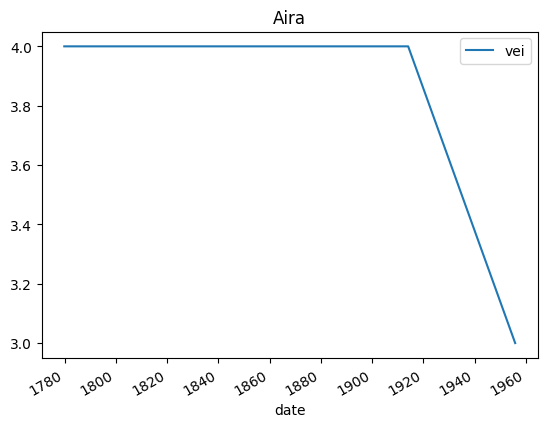

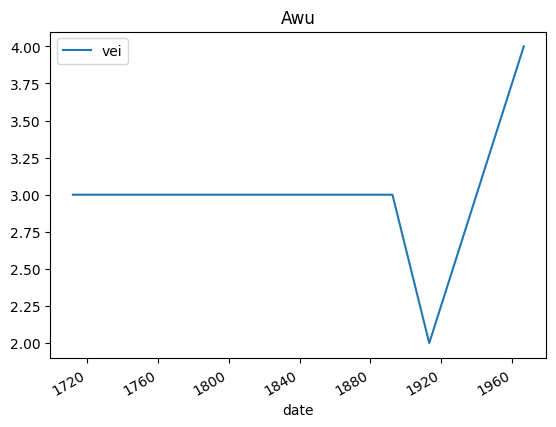

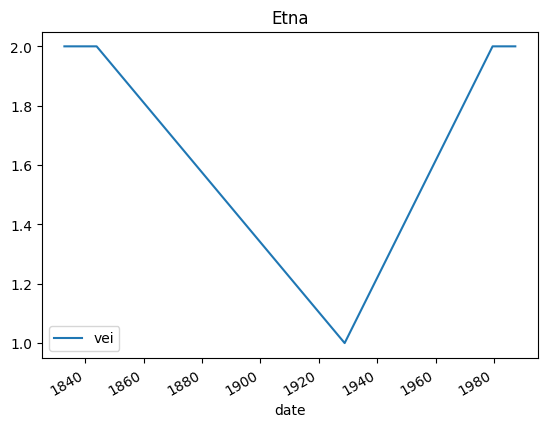

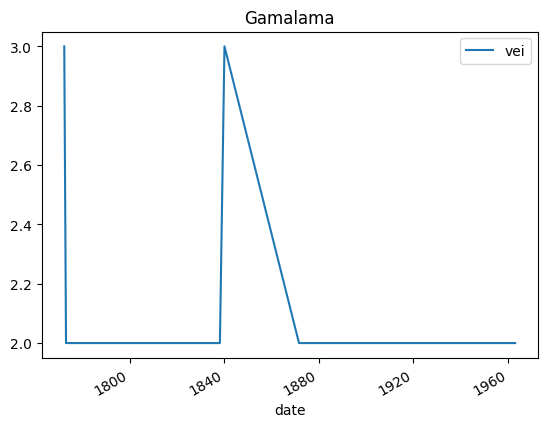

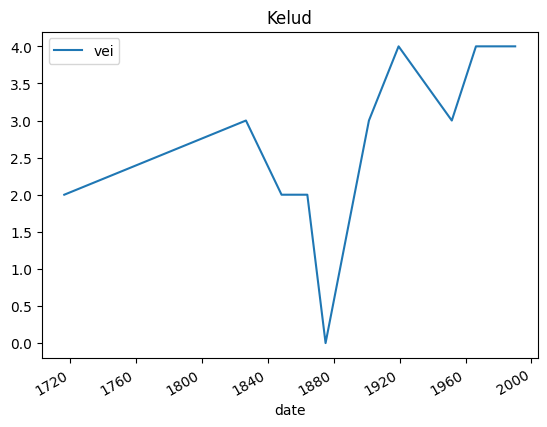

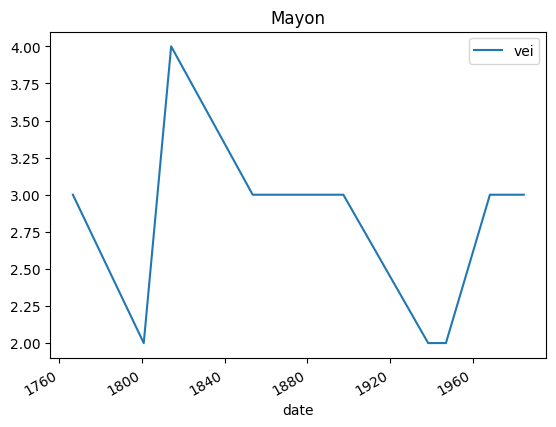

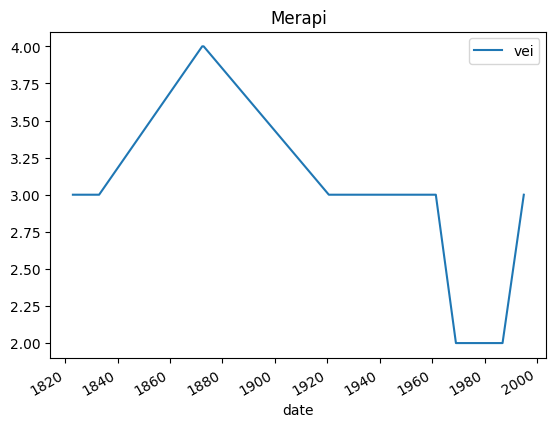

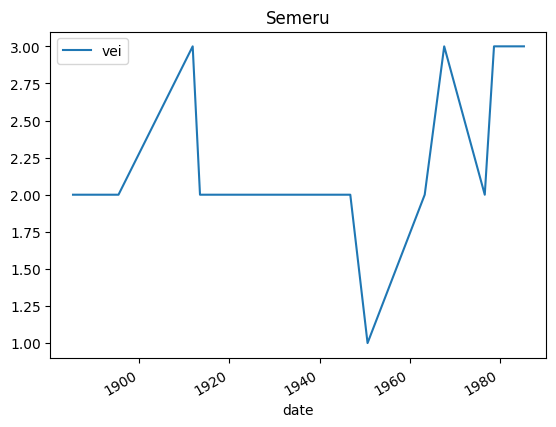

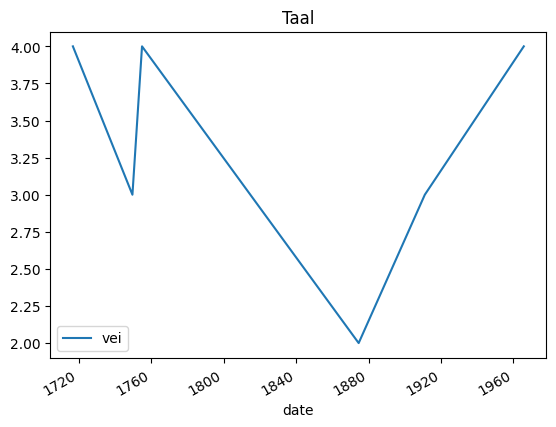

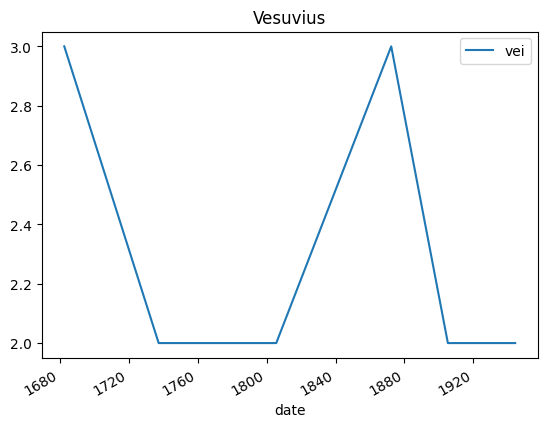

In [13]:
volcano_groups = new_df.groupby('name')
for x in volcano_groups.groups:
  y = volcano_groups.get_group(x)[['vei', 'date']].copy()
  if y.shape[0] > 3:
    plot = y.plot(title=x, x='date', y='vei')

### **Part 3: Fiery Jobs 🚒 (15 POINTS TOTAL)**

Proficiency in SQL is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **sqlite** to access a database.
* Start by downloading the sql lite file and putting it in the same directory as this [notebook](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right).
* Check out the description of the data so you know the table / column names.

The following code will use sqlite3 to create a database connection. sqlite3 is the library in Python that assists in navigating through SQL databases.

In [14]:
import sqlite3
# import pandas as pd. Pandas was already imported from the previous sections

conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

In [15]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',)]


##### **Remember that each problem should be solved with a single sql query.**
**All outputs must be shown**

#### **3.1.1: 2 Points**
***From the Salaries table, get the average base pay for "firefighters" between the year 2011 to 2013.***

In [16]:
query = "SELECT AVG(BasePay) FROM salaries WHERE (JobTitle='FIREFIGHTER' OR JobTitle='EMT/Paramedic/Firefighter') AND Year BETWEEN 2011 AND 2013"

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,AVG(BasePay)
0,101198.906981


#### **3.1.2: 2 Points**
***From the Salaries table, create a table for the year 2014, with a job title of "firefighters" making under $100,000 as a base pay, and sort in descending order by salary.***

In [17]:
query = "SELECT BasePay FROM salaries WHERE (JobTitle='FIREFIGHTER' OR JobTitle='EMT/Paramedic/Firefighter') AND Year = 2014 AND BasePay < 100000 ORDER BY BasePay DESC"

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,BasePay
0,99364.17
1,98673.65
2,98637.95
3,98449.85
4,98369.56
5,97229.73
6,96654.97
7,96555.65
8,96058.18
9,95811.42


#### **3.1.3: 4 Points**
***Create a dataframe with averages of base pay, averages of benefits, and averages of overtime for "firefighters," as well as a column with the sum of these three values.***

In [18]:
query = "SELECT AVG(BasePay), AVG(Benefits), AVG(OvertimePay), (AVG(BasePay) + AVG(Benefits) + AVG(OvertimePay)) FROM salaries WHERE (JobTitle='FIREFIGHTER' OR JobTitle='EMT/Paramedic/Firefighter')"

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,AVG(BasePay),AVG(Benefits),AVG(OvertimePay),(AVG(BasePay) + AVG(Benefits) + AVG(OvertimePay))
0,100397.816933,18613.404743,22570.399685,141581.621361


#### **3.1.4: 7 Points**

***Finally, we'll create our own table in our database. Separate the Salaries table by years, and add it back to the database. Using a loop might be helpful.***

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**

In [19]:
query = "SELECT * FROM salaries WHERE year=2011"
df_all = pd.read_sql(query, conn)
for i in range(3):
  query = "SELECT * FROM salaries WHERE year=" +str(2012+i)
  df_one = pd.read_sql(query, conn)
  df_all = pd.concat([df_all, df_one], axis=0)
df_all.to_sql(name='New_Table', con=conn)

148654

In [20]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('New_Table',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)